In [228]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

In [229]:
import yfinance as yf

In [230]:
icici=yf.Ticker("IBN")
icici_6=icici.history(period="6mo")
icici_1y=icici.history(period="1y")
reliance=yf.Ticker("RELIANCE.NS")
rel_6=reliance.history(period="6mo")
rel_1y=reliance.history(period="1y")

In [231]:
icici_6

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-20,21.500000,21.840000,21.420000,21.510000,6981300,0,0
2022-01-21,21.370001,21.469999,20.950001,21.030001,11442700,0,0
2022-01-24,20.780001,21.110001,20.430000,21.090000,14015300,0,0
2022-01-25,21.240000,21.260000,20.820000,20.940001,13501100,0,0
2022-01-26,21.120001,21.219999,20.690001,20.870001,13924300,0,0
...,...,...,...,...,...,...,...
2022-07-13,18.629999,18.820000,18.580000,18.740000,6860200,0,0
2022-07-14,18.549999,18.950001,18.469999,18.889999,8856000,0,0
2022-07-15,19.040001,19.110001,18.830000,19.000000,4907300,0,0


This is the ICICI 6 months data

In [232]:
icici_1y

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-20,17.029239,17.388170,16.979388,17.348288,5217900,0.0,0
2021-07-21,17.288466,17.527753,17.228645,17.467932,3723100,0.0,0
2021-07-22,17.597544,17.677306,17.517782,17.547693,2452100,0.0,0
2021-07-23,17.996355,18.255583,17.926563,18.235643,8082600,0.0,0
2021-07-26,18.165850,18.315406,18.086088,18.305435,5254800,0.0,0
...,...,...,...,...,...,...,...
2022-07-13,18.629999,18.820000,18.580000,18.740000,6860200,0.0,0
2022-07-14,18.549999,18.950001,18.469999,18.889999,8856000,0.0,0
2022-07-15,19.040001,19.110001,18.830000,19.000000,4907300,0.0,0


This is the ICICI 1 year data

### Cleaning the ICICI Bank Data

In [233]:
icici_6=icici_6.dropna()
icici_6

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-20,21.500000,21.840000,21.420000,21.510000,6981300,0,0
2022-01-21,21.370001,21.469999,20.950001,21.030001,11442700,0,0
2022-01-24,20.780001,21.110001,20.430000,21.090000,14015300,0,0
2022-01-25,21.240000,21.260000,20.820000,20.940001,13501100,0,0
2022-01-26,21.120001,21.219999,20.690001,20.870001,13924300,0,0
...,...,...,...,...,...,...,...
2022-07-13,18.629999,18.820000,18.580000,18.740000,6860200,0,0
2022-07-14,18.549999,18.950001,18.469999,18.889999,8856000,0,0
2022-07-15,19.040001,19.110001,18.830000,19.000000,4907300,0,0


In [234]:
icici_1y=icici_1y.dropna()
icici_1y

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-20,17.029239,17.388170,16.979388,17.348288,5217900,0.0,0
2021-07-21,17.288466,17.527753,17.228645,17.467932,3723100,0.0,0
2021-07-22,17.597544,17.677306,17.517782,17.547693,2452100,0.0,0
2021-07-23,17.996355,18.255583,17.926563,18.235643,8082600,0.0,0
2021-07-26,18.165850,18.315406,18.086088,18.305435,5254800,0.0,0
...,...,...,...,...,...,...,...
2022-07-13,18.629999,18.820000,18.580000,18.740000,6860200,0.0,0
2022-07-14,18.549999,18.950001,18.469999,18.889999,8856000,0.0,0
2022-07-15,19.040001,19.110001,18.830000,19.000000,4907300,0.0,0


In [235]:
rel_6

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-20,2500.050049,2509.949951,2455.000000,2477.449951,7612203,0,0
2022-01-21,2452.000000,2502.250000,2452.000000,2477.850098,6155759,0,0
2022-01-24,2475.000000,2504.750000,2355.100098,2377.899902,10092511,0,0
2022-01-25,2349.550049,2388.649902,2305.000000,2373.250000,11311456,0,0
2022-01-27,2336.000000,2356.100098,2311.050049,2338.100098,9239426,0,0
...,...,...,...,...,...,...,...
2022-07-14,2388.000000,2433.949951,2376.949951,2397.149902,7831798,0,0
2022-07-15,2415.000000,2415.000000,2383.100098,2401.800049,4431880,0,0
2022-07-18,2421.000000,2425.000000,2392.300049,2422.250000,6996757,0,0


This is the Reliance 6 months data

In [236]:
rel_1y

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-20,2099.500000,2108.000000,2084.000000,2093.800049,3111185,0,0
2021-07-22,2119.000000,2123.899902,2098.149902,2120.699951,3679260,0,0
2021-07-23,2134.449951,2134.449951,2102.050049,2105.699951,4585938,0,0
2021-07-26,2108.000000,2121.000000,2071.100098,2076.850098,5717830,0,0
2021-07-27,2076.800049,2083.699951,2042.000000,2055.000000,4995516,0,0
...,...,...,...,...,...,...,...
2022-07-14,2388.000000,2433.949951,2376.949951,2397.149902,7831798,0,0
2022-07-15,2415.000000,2415.000000,2383.100098,2401.800049,4431880,0,0
2022-07-18,2421.000000,2425.000000,2392.300049,2422.250000,6996757,0,0


This is the Reliance 1 year data

### Cleaning the Reliance Data

In [237]:
rel_6=rel_6.dropna()
rel_1y=rel_1y.dropna()

In [238]:
rel_6

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-20,2500.050049,2509.949951,2455.000000,2477.449951,7612203,0,0
2022-01-21,2452.000000,2502.250000,2452.000000,2477.850098,6155759,0,0
2022-01-24,2475.000000,2504.750000,2355.100098,2377.899902,10092511,0,0
2022-01-25,2349.550049,2388.649902,2305.000000,2373.250000,11311456,0,0
2022-01-27,2336.000000,2356.100098,2311.050049,2338.100098,9239426,0,0
...,...,...,...,...,...,...,...
2022-07-14,2388.000000,2433.949951,2376.949951,2397.149902,7831798,0,0
2022-07-15,2415.000000,2415.000000,2383.100098,2401.800049,4431880,0,0
2022-07-18,2421.000000,2425.000000,2392.300049,2422.250000,6996757,0,0


In [239]:
rel_1y

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-20,2099.500000,2108.000000,2084.000000,2093.800049,3111185,0,0
2021-07-22,2119.000000,2123.899902,2098.149902,2120.699951,3679260,0,0
2021-07-23,2134.449951,2134.449951,2102.050049,2105.699951,4585938,0,0
2021-07-26,2108.000000,2121.000000,2071.100098,2076.850098,5717830,0,0
2021-07-27,2076.800049,2083.699951,2042.000000,2055.000000,4995516,0,0
...,...,...,...,...,...,...,...
2022-07-14,2388.000000,2433.949951,2376.949951,2397.149902,7831798,0,0
2022-07-15,2415.000000,2415.000000,2383.100098,2401.800049,4431880,0,0
2022-07-18,2421.000000,2425.000000,2392.300049,2422.250000,6996757,0,0


In [240]:
icici_6g=icici_6.groupby('Date')[['Close']].mean()

In [241]:
icici_6g

,Close
Date,
2022-01-20,21.510000
2022-01-21,21.030001
2022-01-24,21.090000
2022-01-25,20.940001
2022-01-26,20.870001
...,...
2022-07-13,18.740000
2022-07-14,18.889999
2022-07-15,19.000000


In [242]:
icici_1yg=icici_1y.groupby('Date')[['Close']].mean()

In [243]:
icici_1yg

,Close
Date,
2021-07-20,17.348288
2021-07-21,17.467932
2021-07-22,17.547693
2021-07-23,18.235643
2021-07-26,18.305435
...,...
2022-07-13,18.740000
2022-07-14,18.889999
2022-07-15,19.000000


In [244]:
rel_6g=rel_6.groupby('Date')[['Close']].mean()
rel_6g

,Close
Date,
2022-01-20,2477.449951
2022-01-21,2477.850098
2022-01-24,2377.899902
2022-01-25,2373.250000
2022-01-27,2338.100098
...,...
2022-07-14,2397.149902
2022-07-15,2401.800049
2022-07-18,2422.250000


In [245]:
rel_1yg=rel_1y.groupby('Date')[['Close']].mean()
rel_1yg

,Close
Date,
2021-07-20,2093.800049
2021-07-22,2120.699951
2021-07-23,2105.699951
2021-07-26,2076.850098
2021-07-27,2055.000000
...,...
2022-07-14,2397.149902
2022-07-15,2401.800049
2022-07-18,2422.250000


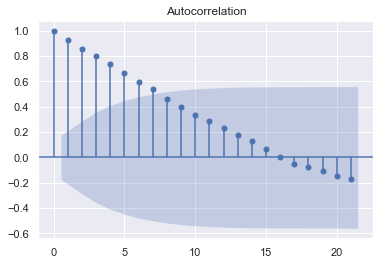

In [246]:
plot_acf(icici_6g)
plt.show()

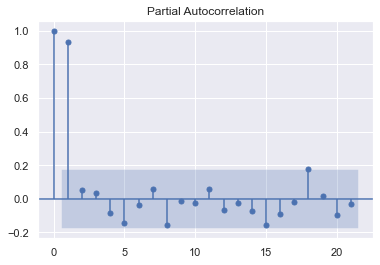

In [247]:
plot_pacf(icici_6g)
plt.show()

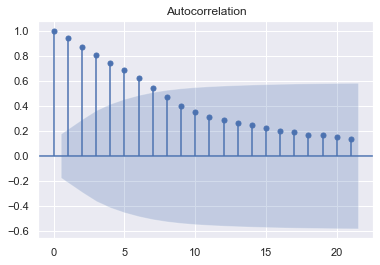

In [248]:
plot_acf(rel_6g)
plt.show()

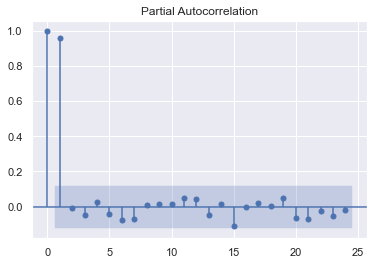

In [249]:
plot_pacf(rel_1yg)
plt.show()

Both the datasets are not stationary. Lag has to be calculated

In [250]:
icici_6g['Close First Difference']=icici_6g['Close']-icici_6g['Close'].shift(1)
icici_6g['Close'].shift(1)

Date
2022-01-20          NaN
2022-01-21    21.510000
2022-01-24    21.030001
2022-01-25    21.090000
2022-01-26    20.940001
                ...    
2022-07-13    18.940001
2022-07-14    18.740000
2022-07-15    18.889999
2022-07-18    19.000000
2022-07-19    19.120001
Name: Close, Length: 124, dtype: float64

In [251]:
icici_1yg['Close First Difference']=icici_1yg['Close']-icici_1yg['Close'].shift(1)
icici_1yg['Close'].shift(1)

Date
2021-07-20          NaN
2021-07-21    17.348288
2021-07-22    17.467932
2021-07-23    17.547693
2021-07-26    18.235643
                ...    
2022-07-13    18.940001
2022-07-14    18.740000
2022-07-15    18.889999
2022-07-18    19.000000
2022-07-19    19.120001
Name: Close, Length: 252, dtype: float64

In [252]:
rel_6g['Close First Difference']=rel_6g['Close']-rel_6g['Close'].shift(1)
rel_6g['Close'].shift(1)

Date
2022-01-20            NaN
2022-01-21    2477.449951
2022-01-24    2477.850098
2022-01-25    2377.899902
2022-01-27    2373.250000
                 ...     
2022-07-14    2377.550049
2022-07-15    2397.149902
2022-07-18    2401.800049
2022-07-19    2422.250000
2022-07-20    2437.100098
Name: Close, Length: 124, dtype: float64

In [253]:
rel_1yg['Close First Difference']=rel_1yg['Close']-rel_1yg['Close'].shift(1)
rel_1yg['Close'].shift(1)

Date
2021-07-20            NaN
2021-07-22    2093.800049
2021-07-23    2120.699951
2021-07-26    2105.699951
2021-07-27    2076.850098
                 ...     
2022-07-14    2377.550049
2022-07-15    2397.149902
2022-07-18    2401.800049
2022-07-19    2422.250000
2022-07-20    2437.100098
Name: Close, Length: 250, dtype: float64

Text(0.5, 1.0, 'ICICI 6 months')

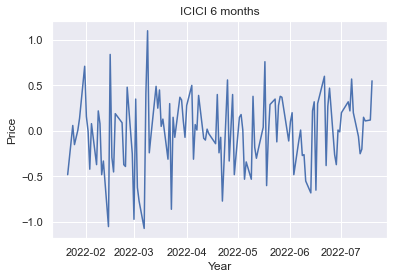

In [254]:
plt.plot(icici_6g['Close First Difference'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('ICICI 6 months')

Text(0.5, 1.0, 'ICICI 1 year')

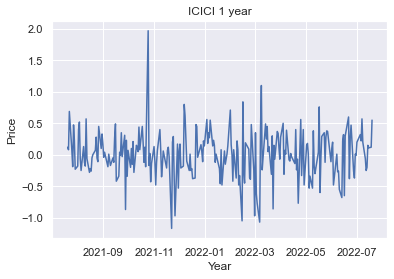

In [255]:
plt.plot(icici_1yg['Close First Difference'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('ICICI 1 year')

Text(0.5, 1.0, 'Reliance 6 months')

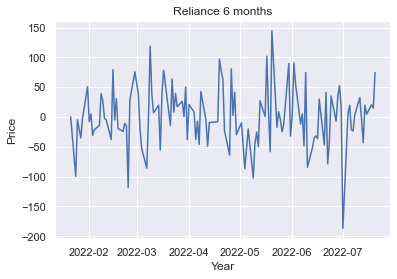

In [256]:
plt.plot(rel_6g['Close First Difference'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Reliance 6 months')

Text(0.5, 1.0, 'Reliance 1 year')

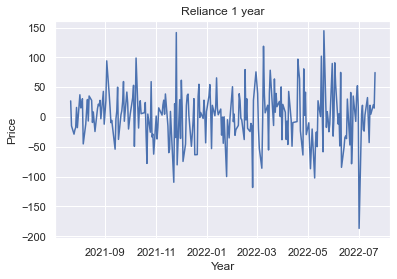

In [257]:
plt.plot(rel_1yg['Close First Difference'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Reliance 1 year')

In [258]:
stepwise_fit=auto_arima(rel_6g['Close'],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1315.883, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1317.772, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1317.769, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1313.887, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1319.678, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.365 seconds


In [259]:
stepwise_fit=auto_arima(rel_1yg['Close'],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2604.304, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2598.106, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2600.089, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2600.089, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2596.463, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2602.085, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.661 seconds


In [260]:
stepwise_fit=auto_arima(icici_6g['Close'],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=128.436, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=125.194, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=127.045, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=127.019, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=123.369, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.530 seconds


In [261]:
stepwise_fit=auto_arima(icici_1yg['Close'],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=223.874, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=225.778, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=225.772, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=222.027, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=227.814, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.792 seconds


In [262]:
model=ARIMA(icici_6g['Close'],order=(0,1,0))
model_fit=model.fit()


c:\Users\Anoushka\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\Anoushka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

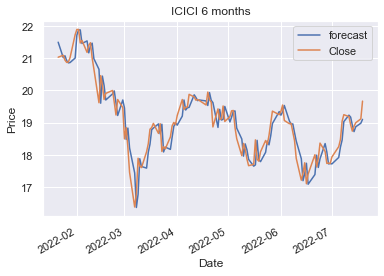

In [263]:
model_fit.plot_predict(dynamic=False)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ICICI 6 months')
plt.show()


In [264]:
pred=model_fit.predict(start=len(icici_6g),end=len(icici_6g)+30,typ='levels')
pred

c:\Users\Anoushka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\Users\Anoushka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


123    19.655041
124    19.640081
125    19.625122
126    19.610163
127    19.595203
128    19.580244
129    19.565285
130    19.550325
131    19.535366
132    19.520407
133    19.505447
134    19.490488
135    19.475528
136    19.460569
137    19.445610
138    19.430650
139    19.415691
140    19.400732
141    19.385772
142    19.370813
143    19.355854
144    19.340894
145    19.325935
146    19.310976
147    19.296016
148    19.281057
149    19.266097
150    19.251138
151    19.236179
152    19.221219
153    19.206260
dtype: float64

In [265]:
model=ARIMA(icici_1yg['Close'],order=(0,1,0))
model_fit=model.fit()

c:\Users\Anoushka\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\Anoushka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

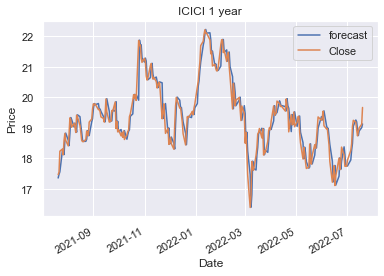

In [266]:
model_fit.plot_predict(dynamic=False)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ICICI 1 year')
plt.show()

In [267]:
pred=model_fit.predict(start=len(icici_1yg),end=len(icici_1yg)+30,typ='levels')
pred

c:\Users\Anoushka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\Users\Anoushka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


251    19.679250
252    19.688500
253    19.697750
254    19.706999
255    19.716249
256    19.725499
257    19.734749
258    19.743999
259    19.753249
260    19.762499
261    19.771748
262    19.780998
263    19.790248
264    19.799498
265    19.808748
266    19.817998
267    19.827247
268    19.836497
269    19.845747
270    19.854997
271    19.864247
272    19.873497
273    19.882747
274    19.891996
275    19.901246
276    19.910496
277    19.919746
278    19.928996
279    19.938246
280    19.947495
281    19.956745
dtype: float64

In [268]:
model=ARIMA(rel_6g['Close'],order=(0,1,0))
model_fit=model.fit()


c:\Users\Anoushka\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\Anoushka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

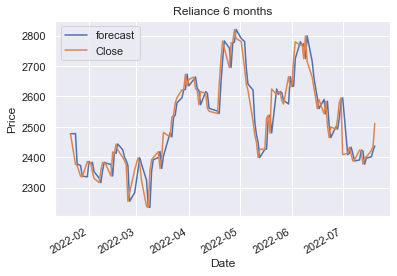

In [269]:
model_fit.plot_predict(dynamic=False)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Reliance 6 months')
plt.show()

In [270]:
pred=model_fit.predict(start=len(rel_6g),end=len(rel_6g)+30,typ='levels')
pred

c:\Users\Anoushka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\Users\Anoushka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


123    2511.827285
124    2512.104522
125    2512.381759
126    2512.658995
127    2512.936232
128    2513.213468
129    2513.490705
130    2513.767941
131    2514.045178
132    2514.322414
133    2514.599651
134    2514.876888
135    2515.154124
136    2515.431361
137    2515.708597
138    2515.985834
139    2516.263070
140    2516.540307
141    2516.817544
142    2517.094780
143    2517.372017
144    2517.649253
145    2517.926490
146    2518.203726
147    2518.480963
148    2518.758200
149    2519.035436
150    2519.312673
151    2519.589909
152    2519.867146
153    2520.144382
dtype: float64

In [271]:
model=ARIMA(rel_1yg['Close'],order=(0,1,0))
model_fit=model.fit()

c:\Users\Anoushka\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\Anoushka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

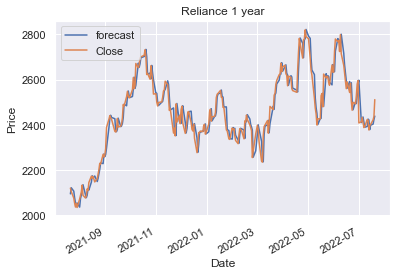

In [272]:
model_fit.plot_predict(dynamic=False)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Reliance 1 year')
plt.show()

In [273]:
pred=model_fit.predict(start=len(rel_1yg),end=len(rel_1yg)+30,typ='levels')
pred

c:\Users\Anoushka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\Users\Anoushka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


249    2513.227760
250    2514.905471
251    2516.583181
252    2518.260892
253    2519.938603
254    2521.616314
255    2523.294025
256    2524.971736
257    2526.649446
258    2528.327157
259    2530.004868
260    2531.682579
261    2533.360290
262    2535.038001
263    2536.715711
264    2538.393422
265    2540.071133
266    2541.748844
267    2543.426555
268    2545.104266
269    2546.781977
270    2548.459687
271    2550.137398
272    2551.815109
273    2553.492820
274    2555.170531
275    2556.848242
276    2558.525952
277    2560.203663
278    2561.881374
279    2563.559085
dtype: float64